# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.

## Learning Outcomes
1. Understand the importance of data preprocessing and feature engineering in machine learning.
2. Learn to implement and tune the XGBoost algorithm for classification tasks.
3. Gain experience in evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.
4. Explore feature importance and interpret model results.
5. Compare the performance of XGBoost with other models like Decision Trees and Random Forests.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Predicting passenger satisfaction can help airlines improve customer experience, optimize services, and increase customer loyalty.

### Mini-task:
Write a brief paragraph on how predicting passenger satisfaction can benefit the airline industry.

---


By identifying important elements that affect a traveler's overall experience, passenger satisfaction prediction can offer the airline sector insightful information. Airlines may use this data to inform data-driven decisions that will improve services like customer service, in-flight entertainment, seat comfort, and timeliness. Airlines may increase brand loyalty, improve customer retention, and even obtain a competitive advantage in the market by proactively resolving areas of dissatisfaction. Additionally, happy customers are more likely to write favorable reviews and refer the airline to others, which has a direct effect on earnings and reputation.

## Step 2: Data Collection
### Task:
Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
airline_data = pd.read_csv('..\sample_data\Invistico_Airline.csv')

# Display the first 10 rows
### YOUR CODE HERE ###
```

---


In [1]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0



## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.

### Mini-task:
Visualize the distribution of the target variable (satisfaction) and inspect the data types of each column.

#### Hint:
Use `value_counts()` to check the distribution of the target variable and `dtypes` to inspect the data types.

```python
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
### YOUR CODE HERE ###

# Display data types
### YOUR CODE HERE ###
```

---


In [2]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [3]:
df.isnull().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [4]:
# Count of each class in the target variable
print(df['satisfaction'].value_counts())


satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64


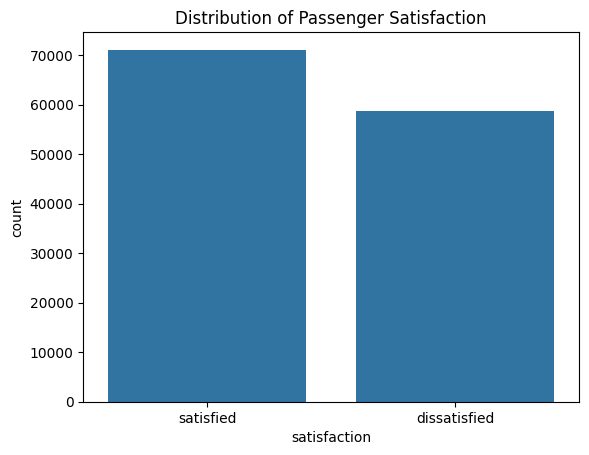

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='satisfaction', data=df)
plt.title('Distribution of Passenger Satisfaction')
plt.show()


In [6]:
print(df.dtypes)

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj


## Step 4: Data Preprocessing
### Task:
Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Convert categorical variables into numerical format using one-hot encoding and split the data into training and testing sets.

#### Hint:
Use `pd.get_dummies()` to encode categorical variables and `train_test_split()` to split the data.

```python
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
### YOUR CODE HERE ###

# Define the target variable and features
### YOUR CODE HERE ###

# Split the data into training and testing sets
### YOUR CODE HERE ###
```

---


In [11]:
# Impute missing values using the median since the Mean is much larger than median which means the data is highly skewed
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [12]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_encoded.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,5,3,2,0,0.0,False,True,True,False
1,47,2464,0,0,0,3,0,2,2,3,...,4,2,3,2,310,305.0,False,True,False,False
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,4,2,0,0.0,False,True,True,False
3,60,623,0,0,0,3,3,4,3,1,...,1,4,1,3,0,0.0,False,True,True,False
4,70,354,0,0,0,3,4,3,4,2,...,2,4,2,5,0,0.0,False,True,True,False


In [13]:
# Append the target variable back to the feature set
df_corr = X_encoded.copy()
df_corr['satisfaction'] = y_encoded  # Add the encoded target

# Compute correlation matrix
corr_with_target = df_corr.corr()['satisfaction'].sort_values(ascending=False)

# Display correlation of each feature with the target
print(corr_with_target)


satisfaction                         1.000000
Inflight entertainment               0.523496
Ease of Online booking               0.431772
Online support                       0.390143
On-board service                     0.352047
Online boarding                      0.338147
Leg room service                     0.304928
Checkin service                      0.266179
Baggage handling                     0.260347
Cleanliness                          0.259330
Seat comfort                         0.242384
Inflight wifi service                0.227062
Food and drink                       0.120677
Age                                  0.117971
Gate location                       -0.012071
Departure/Arrival time convenient   -0.015507
Flight Distance                     -0.039224
Class_Eco Plus                      -0.067537
Departure Delay in Minutes          -0.073909
Arrival Delay in Minutes            -0.080487
Type of Travel_Personal Travel      -0.109239
Class_Eco                         

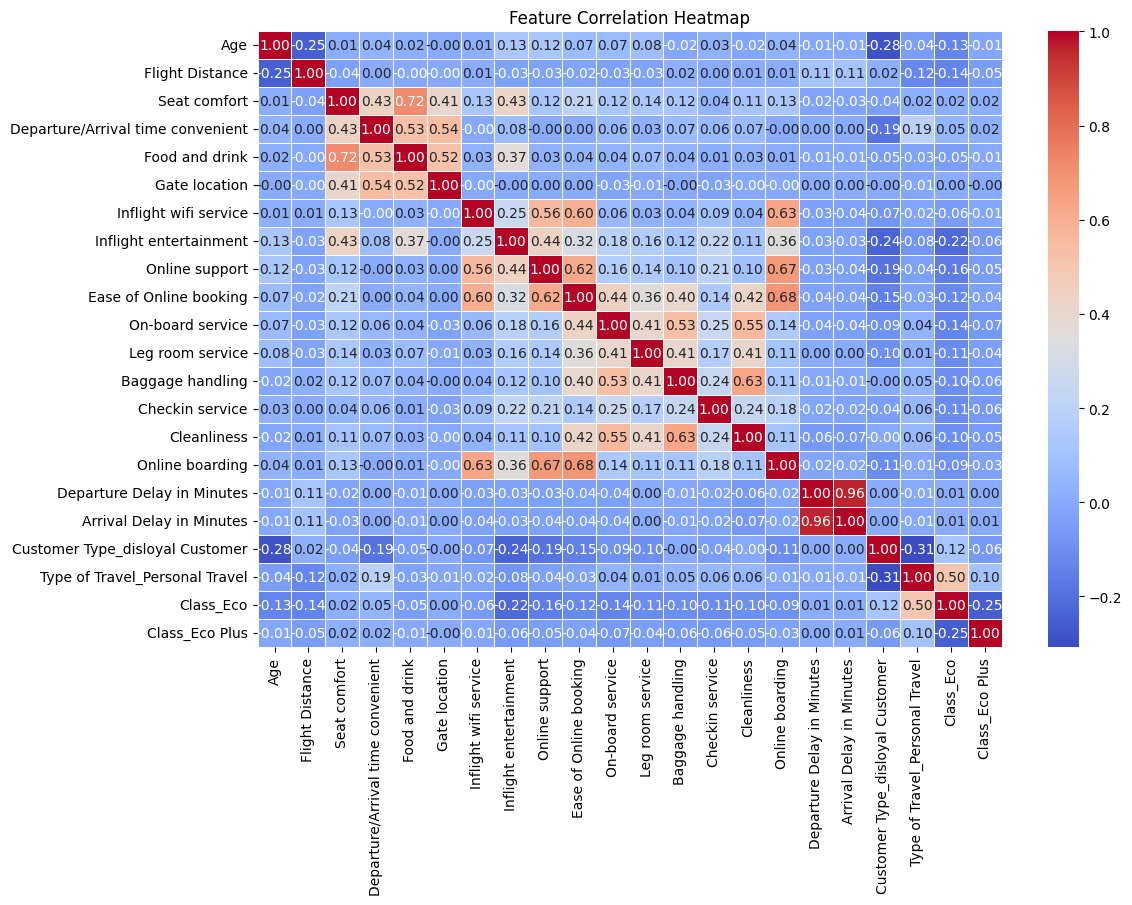

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_encoded.corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set the title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()


## Interpretation of the Correlations:
1. Strongest Positive Correlations:
- Inflight entertainment (0.52) — has the strongest positive correlation with satisfaction, meaning as its rating increases, satisfaction likely increases.

- Ease of Online booking, Online support, On-board service — also positively impact satisfaction to a notable extent.

2. Negative Correlations:
- Customer Type_disloyal Customer (-0.29) — strong negative correlation; disloyal customers tend to be less satisfied.

- Class_Eco (-0.28) — passengers flying in economy class report lower satisfaction.

- Type of Travel_Personal Travel (-0.11) — personal travelers seem slightly less satisfied than business travelers.

- Delays and Gate location — slightly negatively correlated, suggesting minor impact.

The prediction task should be done iteratively hence we will use all the features first for the initial training and analysis. The correlation analysis in addition with the feature importance score from the xgboost will help with further analysis

In [14]:
print(y_encoded)
print(y_encoded.shape)

[1 1 1 ... 0 0 0]
(129880,)


In [15]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Check the shape of the splits to ensure it's done correctly
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (103904, 22)
Testing data shape: (25976, 22)
Training labels shape: (103904,)
Testing labels shape: (25976,)


## Step 5: Model Training Using XGBoost
### Task:
Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.

### Mini-task:
Define the XGBoost classifier and perform hyperparameter tuning.

#### Hint:
Use `XGBClassifier()` and `GridSearchCV()` to tune hyperparameters like `max_depth`, `learning_rate`, and `n_estimators`.

```python
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
### YOUR CODE HERE ###

# Define the parameters for hyperparameter tuning
### YOUR CODE HERE ###

# Perform GridSearchCV
### YOUR CODE HERE ###

# Display the best parameters
### YOUR CODE HERE ###
```

---

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameters for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],              # Depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],   # Learning rate
    'n_estimators': [50, 100, 200],      # Number of trees (estimators)
    'subsample': [0.8, 1.0],             # Fraction of samples to train each tree
    'colsample_bytree': [0.8, 1.0]       # Fraction of features to use for each tree
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Display the best parameters
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:05:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}



## Step 6: Model Evaluation
### Task:
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

### Mini-task:
Evaluate the model on the test set and visualize the confusion matrix and feature importance.

#### Hint:
Use `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()` to evaluate the model. Use `confusion_matrix()` and `plot_importance()` for visualization.

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
### YOUR CODE HERE ###

# Calculate evaluation metrics
### YOUR CODE HERE ###

# Plot the confusion matrix
### YOUR CODE HERE ###

# Plot feature importance
### YOUR CODE HERE ###
```

---

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # For binary classification
recall = recall_score(y_test, y_pred, average='binary')  # For binary classification
f1 = f1_score(y_test, y_pred, average='binary')  # For binary classification

# Print evaluation metrics
print(f"Accuracy on test data: {accuracy * 100:.2f}%")
print(f"Precision on test data: {precision:.2f}")
print(f"Recall on test data: {recall:.2f}")
print(f"F1 Score on test data: {f1:.2f}")

Accuracy on test data: 95.83%
Precision on test data: 0.97
Recall on test data: 0.95
F1 Score on test data: 0.96


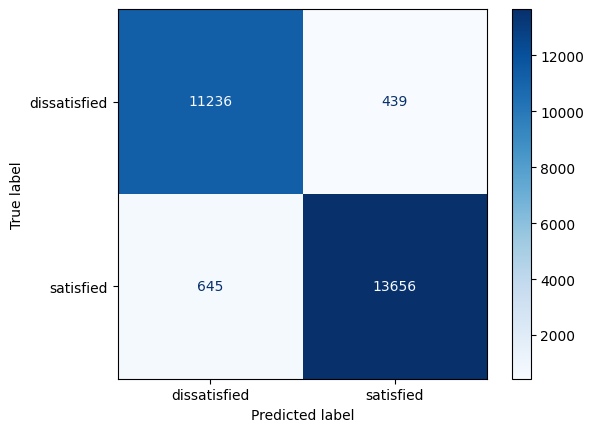

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
cm_display.plot(cmap='Blues')

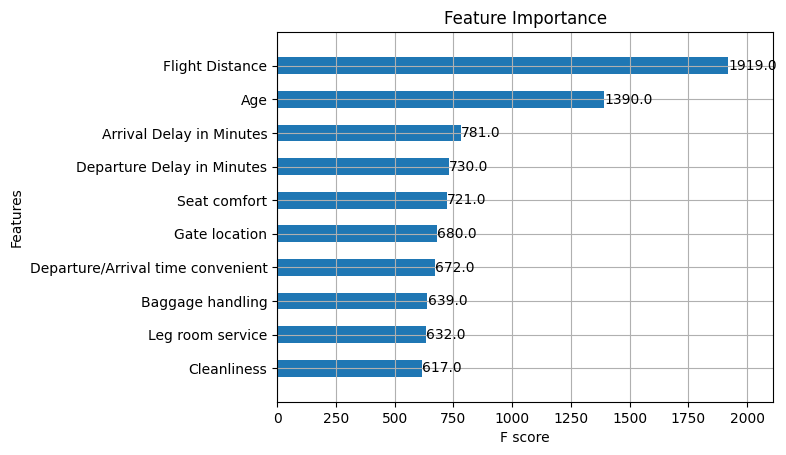

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance using the trained XGBoost model
xgb.plot_importance(best_xgb_model, importance_type='weight', max_num_features=10, title="Feature Importance", height=0.5)
plt.show()


## Step 7: Model Comparison (Optional)
### Task:
Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.

### Mini-task:
Train a Decision Tree and Random Forest model, and compare their performance with the XGBoost model.

#### Hint:
Use `DecisionTreeClassifier()` and `RandomForestClassifier()` to train the models and compare their accuracy.

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
### YOUR CODE HERE ###

# Train a Random Forest model
### YOUR CODE HERE ###

# Compare model performance
### YOUR CODE HERE ###
```

---

## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of hyperparameter tuning and feature engineering.
- Consider how the model's insights can be applied to improve airline services.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different features on passenger satisfaction.

**What would you share with and recommend to stakeholders?**
- Highlight the key features that contribute most to passenger satisfaction.
- Recommend strategies to improve services based on the model's insights.

# Key Takeaways from the Project
- High Performance Metrics: The model achieved impressive results with an accuracy of 95.83%, precision of 0.97, recall of 0.95, and F1 score of 0.96. This demonstrates its reliability in predicting passenger satisfaction.

- Feature Importance: Flight Distance and Age ranked highest in importance, followed closely by Arrival Delay in Minutes, Departure Delay in Minutes, and Seat Comfort. These insights emphasize the pivotal factors influencing passenger satisfaction. Flight Distance is a key determinant of passenger satisfaction, possibly linked to how airline services adjust based on flight length and age likely influences preferences for comfort, services, and overall travel experience. Also, Flight Distance & Age are highly used in XGBoost despite weak correlation — this is common, as tree-based models capture non-linear and interaction effects, unlike correlation which is purely linear.

## Importance of Hyperparameter Tuning and Feature Engineering
- Hyperparameter Tuning: Adjusting parameters like colsample_bytree (0.8), learning_rate (0.2), max_depth (7), n_estimators (200), and subsample (1.0) optimized the model’s performance. This step ensures the model learns effectively without overfitting.

- Feature Engineering: Identifying relevant features such as delays and comfort-related aspects enhances the model's predictive capabilities and offers actionable insights for service improvements.

- Transform Flight Distance: Consider segmenting flight distances into categories (short-haul, medium-haul, and long-haul) to capture different service expectations.
- Feature Interaction Terms: Combine features like "Flight Distance" and "Seat Comfort" to capture complex relationships.

## Applying Insights to Improve Airline Services
1. Reducing Delays: Addressing arrival and departure delays should be a priority since they significantly impact passenger satisfaction.

2. Enhancing Comfort: Features like seat comfort and legroom service can be improved to elevate the overall travel experience.

3. Streamlining Gate Operations: Optimizing gate location and baggage handling processes can also contribute to higher satisfaction rates.

4. Focusing on Cleanliness: Maintaining cleanliness ensures passengers have a positive perception of the airline.

5. Improvements Related to Flight Distance


- Short-Haul Flights: Focus on quick boarding processes, efficient baggage handling, and minimal delays to cater to time-sensitive passengers.

- Medium-Haul Flights: Offer in-flight entertainment, light meals, and comfortable seating to improve passenger experience.

- Long-Haul Flights: Provide upgraded amenities, such as lie-flat seats, enhanced meal options, Wi-Fi connectivity, and comprehensive entertainment systems.

6. Optimized Flight Schedules:

- Reduce layovers and improve scheduling to minimize inconvenience on medium and long-haul routes.

- Pricing and Loyalty Programs: Offer competitive pricing tiers or loyalty benefits specific to frequent travelers on certain flight distances.

7. Improvements Based on Passenger Age
- Age-Specific Preferences:

- Younger Travelers: Focus on affordable flights, Wi-Fi availability, and in-flight entertainment tailored to their interests.

- Middle-Aged Travelers: Emphasize comfort, on-time performance, and family-friendly services like priority boarding for families.

- Older Travelers: Provide additional assistance for boarding, accessibility features, and ergonomic seating to ensure comfort.

- Targeted Marketing Campaigns: Develop promotions and services that appeal to the specific needs of each age group, such as discounted rates for seniors or adventure packages for younger travelers.

## Sharing Findings with a Team
- Visualizing Data: Present key metrics and results using clear visualizations, such as the feature importance bar chart. This makes complex data more digestible.

- Highlighting Impacts: Focus on how each feature affects passenger satisfaction and emphasize the actionable insights derived from the model.

- Tailoring Communication: Adapt the presentation for the team’s needs, using visuals and storytelling to keep the findings engaging.

## Recommendations to Stakeholders
1. Key Features to Prioritize
- Top contributors to passenger satisfaction include reducing delays, improving comfort, and addressing operational inefficiencies.

2. Strategies for Improvement:

- Optimize flight schedules to minimize delays.

- Invest in ergonomically designed seats and spacious layouts.

- Ensure cleanliness and hygiene standards are consistently met.

- Streamline gate and baggage handling operations.

- Customer-Centric Approach: Incorporate feedback mechanisms to regularly assess passenger satisfaction and identify areas for improvement.

- Train staff to handle diverse passenger needs, from assisting senior travelers to managing family groups with children effectively.